# Regression Model with one variable
- Input variable : x
- Original output : y
- Number of training examples : m
- weight & bia : w,b
- learning rate : α
- Model $f_{w,b}(x) = wx+b$
- Cost Function (MSE) $J(w,b) = \frac{1}{2m}\sum_{i=1}^m(f_{w,b}(x^i)-y^i)^2$
- Minimizing cost function using gradient descent
  - Compute gradients
    - $\frac{\partial J}{\partial w}$ = $\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)x^i$
    - $\frac{\partial J}{\partial b}$ = $\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)$
  - Update Parameters
    - w = w - α$\\frac{\partial J}{\partial w} = w - α[\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)x^i]$
    - b = b - α$\frac{\partial J}{\partial b} = b - α[\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)]$


# Data Set
- newspaper_add_budget x = [69.2, 45.1, 69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2]
- sales_of_product y = [22.1, 10.4, 12, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6]

## Notation
Here is a summary of some of the notation used.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values   | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets   | `y_train`
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

x_train = np.array([69.2, 45.1, 69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2])
y_train = np.array([22.1, 10.4, 12, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train = [69.2 45.1 69.3 58.5 58.4 75.  23.5 11.6  1.  21.2]
y_train = [22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]
Number of training examples is: 10


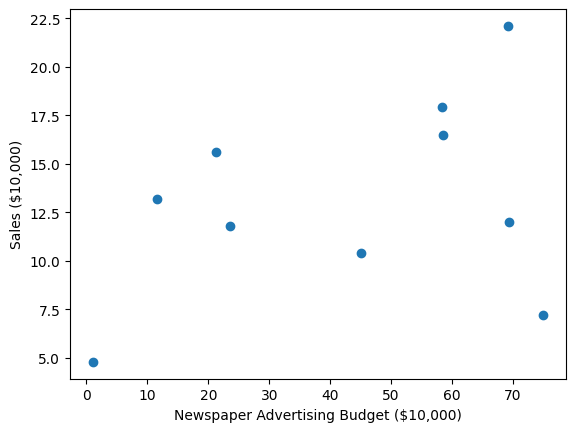

In [3]:
plt.scatter(x_train, y_train)
plt.xlabel("Newspaper Advertising Budget ($10,000)")
plt.ylabel("Sales ($10,000)")
plt.show()

In [82]:
# Setting model parameters
w = 0.0702
b = 10.1138
print(f"w: {w}")
print(f"b: {b}")

w: 0.0702
b: 10.1138


In [10]:
# method to compute model output
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

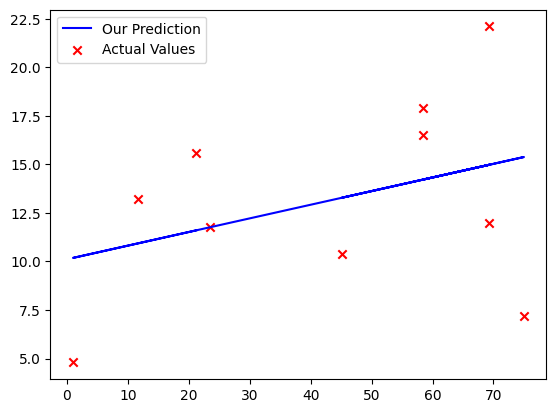

In [83]:
# pass the x_train, w, b to the model and compute the sales from model
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.legend()
plt.show()

In [25]:
# Computing cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost=0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [28]:
print(f"Cost at w: {w}, b: {b} is {compute_cost(x_train, y_train, w, b)}")

Cost at w: 0.5, b: 0.5 is 110.5445


In [29]:
# Compute gradients
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw += (f_wb - y[i]) * x[i]
    dj_db += f_wb - y[i]
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [77]:
# Gradient descent implementation
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  J_history=[]
  p_history=[]
  b = b_in
  w = w_in
  J_history.append(cost_function(x,y,w,b))
  p_history.append([w,b])

  for i in range(num_iters):
    if ((cost_function(x,y,w,b))>0 and (cost_function(x,y,w,b))<1):
      print(cost_function(x,y,w,b))
      break
    else:
      dj_dw, dj_db = compute_gradient(x,y,w,b)
      b = b - alpha * dj_db
      w = w - alpha * dj_dw
      if i<1000000:
        J_history.append(cost_function(x,y,w,b))
        p_history.append([w,b])
      # Print cost every at intervals 10 times or as many iterations if < 10
      if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
        f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
        f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, J_history, p_history

In [78]:
w_init = 0.5
b_init = 0.5
iterations = 1000000
tmp_alpha = 0.0001

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.15e+01  dj_dw:  6.680e+02, dj_db:  8.990e+00   w:  4.332e-01, b: 4.99101e-01
Iteration 100000: Cost 1.03e+01  dj_dw:  3.243e-03, dj_db: -1.889e-01   w:  8.276e-02, b: 9.37921e+00
Iteration 200000: Cost 1.02e+01  dj_dw:  2.477e-04, dj_db: -1.443e-02   w:  7.112e-02, b: 1.00577e+01
Iteration 300000: Cost 1.02e+01  dj_dw:  1.892e-05, dj_db: -1.102e-03   w:  7.023e-02, b: 1.01095e+01
Iteration 400000: Cost 1.02e+01  dj_dw:  1.445e-06, dj_db: -8.419e-05   w:  7.016e-02, b: 1.01135e+01
Iteration 500000: Cost 1.02e+01  dj_dw:  1.104e-07, dj_db: -6.430e-06   w:  7.015e-02, b: 1.01138e+01
Iteration 600000: Cost 1.02e+01  dj_dw:  8.429e-09, dj_db: -4.911e-07   w:  7.015e-02, b: 1.01138e+01
Iteration 700000: Cost 1.02e+01  dj_dw:  6.438e-10, dj_db: -3.751e-08   w:  7.015e-02, b: 1.01138e+01
Iteration 800000: Cost 1.02e+01  dj_dw:  4.909e-11, dj_db: -2.865e-09   w:  7.015e-02, b: 1.01138e+01
Iteration 900000: Cost 1.02e+01  dj_dw:  3.676e-12, dj_db: -2.189e-10   w:  7.015e-0

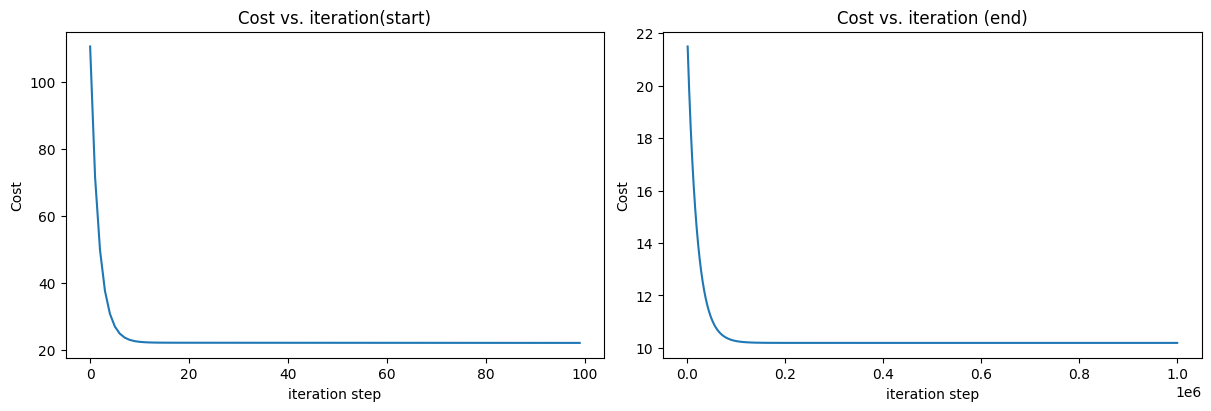

In [79]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [81]:
print(w_final*7.2+b_final)

10.618912445982444
